# What is an Outlier

An outlier is a data point that significantly differs from other observations in a dataset. It appears to deviate markedly from the pattern seen in the rest of the data. The presence of outliers can often skew and mislead the training process of machine learning models resulting in longer training times, less accurate models, and ultimately poorer results.

Characteristics of Outliers
Statistical Anomaly: From a statistical perspective, an outlier is an observation that lies an abnormal distance from other values in a random sample. For example, in a normal distribution, outliers might be those values that are more than three standard deviations from the mean.

Source of Outliers: They can be due to variability in the measurement or may indicate experimental errors; other times, they could be just variation in the data. Outliers can also result from a flaw in the assumed distribution of data, incorrect data entry or recording errors, or genuine rare events.

## Impact on Analysis:

Skewness: Outliers can skew statistical measures and data distributions, leading to misinterpretation of the data.

Model Fitting: In machine learning, certain algorithms are sensitive to outliers, which can lead to incorrect model fitting. Algorithms like linear regression are particularly vulnerable because they try to fit the majority of data points.

Summary Statistics: Outliers can affect the mean and standard deviation of an observational data set, which in turn can mislead interpretations made from those statistics.

## Detecting Outliers

Visual Methods: Box plots and scatter plots are commonly used to find outliers. A box plot shows the summary statistics of a dataset, including the outliers that fall beyond the whiskers.

Statistical Tests: Z-score and IQR (Interquartile Range) are typical measures used to identify outliers. Observations with a Z-score (the number of standard deviations a data point is from the mean) beyond a threshold (commonly 3) are considered outliers.

Machine Learning Techniques: Clustering methods (like K-means, DBSCAN) can also be used to detect outliers. Points that fall far from any cluster may be considered outliers.

## Managing Outliers

Exclusion: Removing outliers might be appropriate if they are due to errors.

Capping: Values can be capped at a certain percentile based on distribution.

Transformation: Applying a mathematical transformation (like log) to reduce the variation caused by outliers.

Using Robust Methods: Utilizing algorithms that are less sensitive to outliers, like Random Forest or using robust statistical measures like median, median absolute deviation instead of mean and standard deviation.

-------------

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #show all the column

## Generating Data

In [3]:
# Choose a mean,standard deviation, and number of samples
mean_age = 22
std = 5
seed = 0
size = 1000
np.random.seed(seed)
sample = np.random.normal(loc=mean_age,scale=std,size=size)

## Visualize and Describe the Data

/var/folders/bw/7qdh0ynx0c9bf8j9_sfpt8fw0000gn/T/ipykernel_88143/1469585388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample,bins=10,kde=False)


<Axes: >

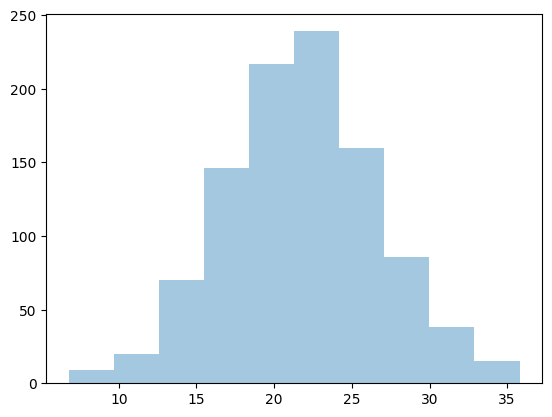

In [4]:
sns.distplot(sample,bins=10,kde=False)

<Axes: >

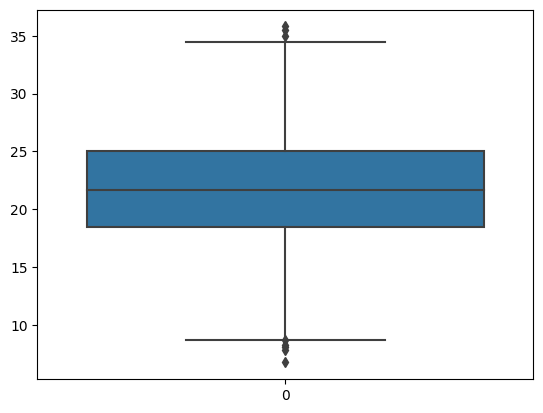

In [5]:
sns.boxplot(sample)

There are many ways to identify and remove outliers:
* Trimming based off a provided value from a subject matter expert, for example a study which involves adult age like voting then any age below 18 years old can be considered as outliers.
* Statistical tests like z-tests or IQR Tests.
* For IQR test, the commonly used rule is that a data point is an outlier if it is more than $1.5 \cdotp IQR$ ‍ above the third quartile or below the first quartile. Said differently, low outliers are below $Q_{1} − (1.5 \cdotp IQR)$ ‍ and high outliers are above $Q_3 + (1.5 \cdotp IQR)$

## Ames Data Set

Let's explore any extreme outliers in our Ames Housing Data Set

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/AmesHousing/train.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Technique 1: Look into individual features for outliers
---

[Text(0, 0, 'Id'),
 Text(1, 0, 'MSSubClass'),
 Text(2, 0, 'LotFrontage'),
 Text(3, 0, 'LotArea'),
 Text(4, 0, 'OverallQual'),
 Text(5, 0, 'OverallCond'),
 Text(6, 0, 'YearBuilt'),
 Text(7, 0, 'YearRemodAdd'),
 Text(8, 0, 'MasVnrArea'),
 Text(9, 0, 'BsmtFinSF1'),
 Text(10, 0, 'BsmtFinSF2'),
 Text(11, 0, 'BsmtUnfSF'),
 Text(12, 0, 'TotalBsmtSF'),
 Text(13, 0, '1stFlrSF'),
 Text(14, 0, '2ndFlrSF'),
 Text(15, 0, 'LowQualFinSF'),
 Text(16, 0, 'GrLivArea'),
 Text(17, 0, 'BsmtFullBath'),
 Text(18, 0, 'BsmtHalfBath'),
 Text(19, 0, 'FullBath'),
 Text(20, 0, 'HalfBath'),
 Text(21, 0, 'BedroomAbvGr'),
 Text(22, 0, 'KitchenAbvGr'),
 Text(23, 0, 'TotRmsAbvGrd'),
 Text(24, 0, 'Fireplaces'),
 Text(25, 0, 'GarageYrBlt'),
 Text(26, 0, 'GarageCars'),
 Text(27, 0, 'GarageArea'),
 Text(28, 0, 'WoodDeckSF'),
 Text(29, 0, 'OpenPorchSF'),
 Text(30, 0, 'EnclosedPorch'),
 Text(31, 0, '3SsnPorch'),
 Text(32, 0, 'ScreenPorch'),
 Text(33, 0, 'PoolArea'),
 Text(34, 0, 'MiscVal'),
 Text(35, 0, 'MoSold'),
 Text(36, 

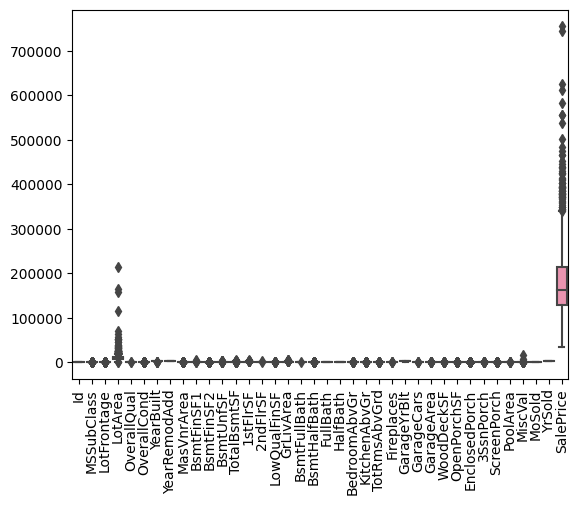

In [8]:
my_plot = sns.boxplot(data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

<Axes: >

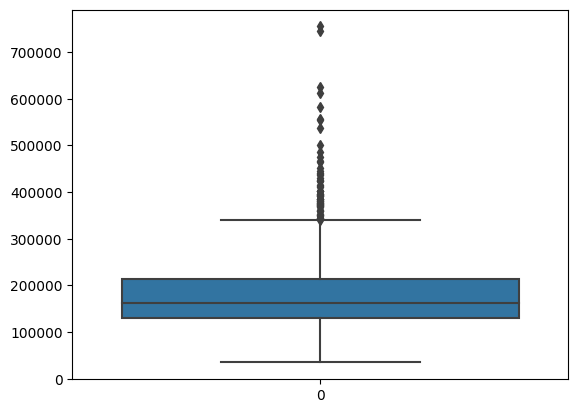

In [9]:
sns.boxplot(df["SalePrice"])

<Axes: >

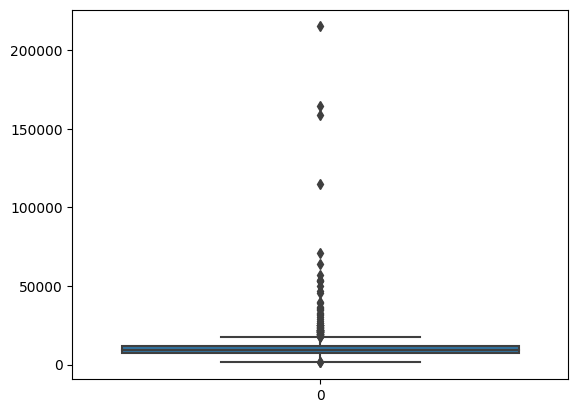

In [10]:
sns.boxplot(df["LotArea"])

* Cleaning strategy involves performing an IQR test or Z-test to remove outliers.

# Strategy 2: Determine which factors impacts the feature of interest.
---

/var/folders/bw/7qdh0ynx0c9bf8j9_sfpt8fw0000gn/T/ipykernel_88143/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

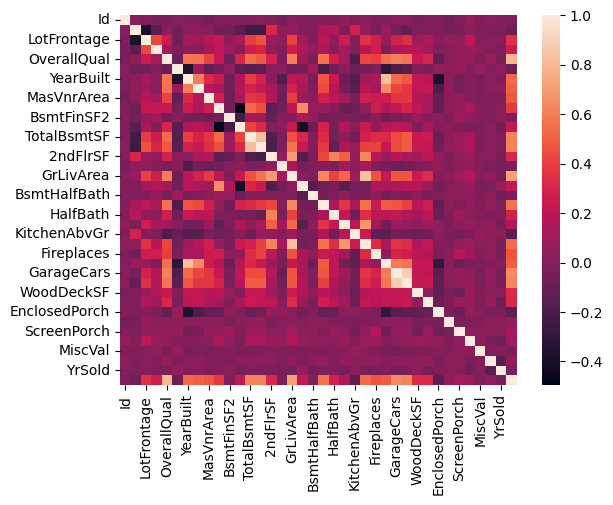

In [11]:
sns.heatmap(df.corr())

# NOTE:
* Outliers typically cannot be directly determined from a correlation matrix alone, as a correlation matrix primarily provides insights into the linear relationships between pairs of variables within a dataset, not the individual values themselves. However, there are indirect ways by which you can use information from a correlation matrix to infer the presence of outliers, or more specifically, how outliers might be influencing the relationships between variables. Here’s a step-by-step explanation of how this could work:

## Understanding Correlation Matrices
### What is a Correlation Matrix?
* A correlation matrix is a table showing correlation coefficients between sets of variables. Each cell in the table shows the correlation between two variables. The value ranges from -1 to 1, where:

* 1 indicates a perfect positive linear relationship,
* -1 indicates a perfect negative linear relationship,
* 0 indicates no linear relationship.

## Diagnosing Influence
* A correlation matrix can help diagnose the influence of outliers in a few ways:

* Unusually High or Low Correlations: Sometimes, an outlier can artificially inflate or deflate a correlation coefficient. If you suspect a correlation coefficient does not reflect the true relationship between variables, it may be influenced by outliers.

* Inconsistency with Other Data: If correlations are inconsistent with historical data trends or theoretical expectations, it could suggest that outliers or anomalies are present.

## Detecting Outliers Related to Correlation

* While the correlation matrix itself doesn’t highlight outliers, you can use the following steps to explore them based on the insights from the matrix:

### Visual Inspection
* Scatter Plots: For any two variables with a high or unexpectedly low correlation, plot a scatter plot to visualize their relationship. Look for points that fall far from the general cloud of points as these may be outliers.

### Residual Analysis (for Linear Relationships)
* If you perform a linear regression based on variables that are highly correlated, examine the residuals (differences between observed and predicted values). Large residuals may indicate outliers.

### Conditional Outliers
* If the correlation matrix helps identify pairs of variables with strong relationships, you can condition on one variable and look for outliers in the distribution of the other. For example, if height and weight are highly correlated, you might look at the weight distribution among individuals of a similar height and identify any weights that are unusually high or low as outliers.

## Statistical Methods to Confirm Outliers
* Standard Deviation Method: For each variable, calculate the mean and standard deviation. Points that lie more than 3 standard deviations from the mean can be considered outliers.
* Interquartile Range (IQR) Method: Use the IQR to find outliers. Values below Q1 - 1.5IQR or above Q3 + 1.5IQR can be considered outliers.
Z-Score: Calculate the Z-score for each data point; values with a Z-score above 3 or below -3 are typically considered outliers.

## Integration with Correlation Analysis
* Adjust Data and Recheck Correlation: After identifying potential outliers using the above methods, you can temporarily remove them and recalculate the correlation matrix to see if the correlations significantly change. This can confirm the impact of the outliers on the observed correlations.

* Ultimately, determining the presence and impact of outliers often requires a combination of these methods along with domain knowledge. While a correlation matrix provides a broad view of variable relationships, the detailed analysis to identify outliers typically involves deeper statistical analysis and visualization techniques.

In [12]:
df.corr()['SalePrice'].sort_values()

/var/folders/bw/7qdh0ynx0c9bf8j9_sfpt8fw0000gn/T/ipykernel_88143/4269891110.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['SalePrice'].sort_values()


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

## Cleaning Strategy: Create a cut-off

In [13]:
df1 = df.copy()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

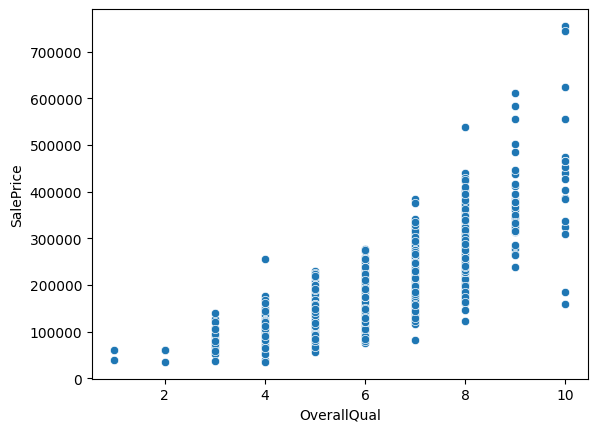

In [14]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df1)

In [15]:
# trimming with threshold values
df1[(df1['OverallQual']>8) & (df1['SalePrice']<200000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

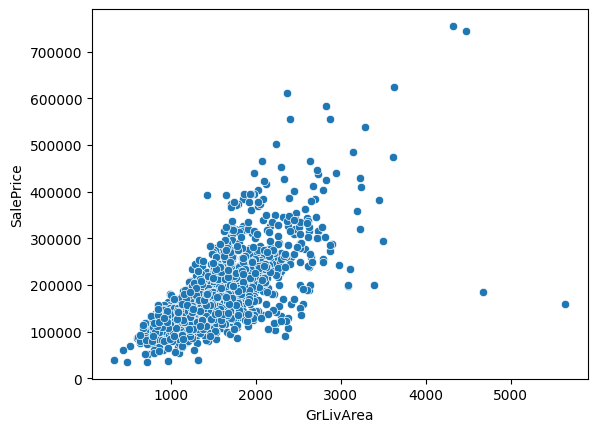

In [16]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df1)

In [17]:
df1[(df1['GrLivArea']>4000) & (df1['SalePrice']<400000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [18]:
df1[(df1['GrLivArea']>4000) & (df1['SalePrice']<400000)].index

Int64Index([523, 1298], dtype='int64')

In [19]:
ind_drop = df1[(df1['GrLivArea']>4000) & (df1['SalePrice']<400000)].index

In [20]:
df1 = df1.drop(ind_drop,axis=0)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

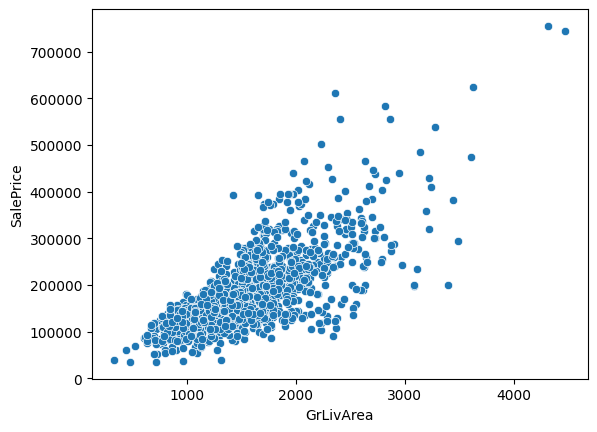

In [21]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df1)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

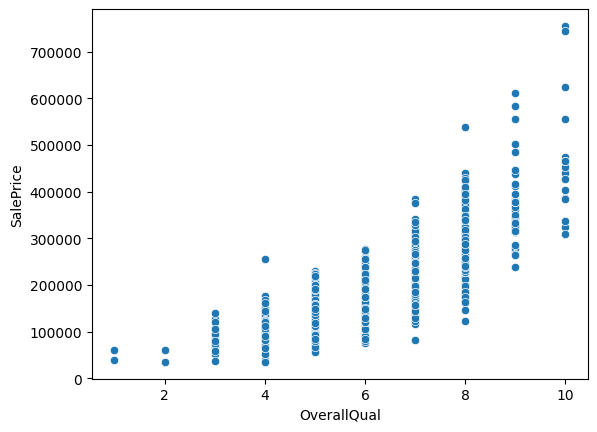

In [22]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df1)

# Modelling Approach Using Statistical Procedures
---

- In statistics, particularly in the context of regression analysis, the concepts of influence and leverage are important in understanding how individual data points affect the overall model. These concepts are crucial when identifying outliers that might distort the results of a regression analysis. Here’s a detailed look at each term:

## Leverage

### Definition:

- Leverage is a measure of how far an independent variable's value deviates from the mean of those variables. High leverage points are those observations that have extreme predictor (independent variable) values. They are far from the centroid of the predictors, which is the point defined by the means of all the independent variables.

### Mathematical Perspective:

- In a regression model, the leverage of the $i^{th}$ observation can be quantified using the leverage statistic, $h_{i,i}$, which is an element of the hat matrix $\textbf{H}$, (the matrix that maps the vector of observed dependent variables to the vector of fitted values). This statistic ranges from $\frac{1}{n}$, n is the number of observations, to 1. The average leverage across all points is $\frac{p}{n}$ , where $p$ is the number of predictors including the intercept.


### Impact:

- Observations with high leverage can disproportionately affect the position and slope of the regression line. They have the potential to pull the regression line closer to themselves, thus influencing the fitted values substantially.

## Influence

### Definition:

- An influential point is an observation that significantly changes the estimate of regression coefficients when it is removed from the dataset. Influence combines leverage with the residual error of the observation.

### Measuring Influence:

- Various statistics measure the influence of an observation:
* Cook's Distance: This is a commonly used measure that assesses the change in regression coefficients when a particular data point is removed. It combines information about the observation’s leverage and the size of its residual.
* DFBETAS: These are changes in the estimated regression coefficients when an observation is removed. Each DFBETA corresponds to a change in a particular coefficient, giving a detailed view of influence.
* DFITS: This is another metric similar to Cook’s Distance but focuses on changes in the fitted values themselves.

### Interpretation:

- A data point with high influence can lead to misleading analysis and conclusions because it overly dictates the terms and fit of the model. Removing these points often changes the results significantly, suggesting that the model is sensitive to specific data configurations.


## Relationship Between Leverage and Influence

- While all influential points are likely to have high leverage (because they can greatly alter the fit of the model due to their position in the predictor space), not all high-leverage points are influential. A high-leverage point may not be influential if it aligns well with the overall pattern of the data (i.e., it has a small residual).

## Practical Use
* Detection: Identifying high leverage and influential points is crucial during the diagnostic phase of building a regression model. Analysts typically plot leverage against residuals or examine Cook’s Distance to spot problematic observations.

* Decision Making: Decisions about whether to exclude high leverage or influential points from a model depend on context, such as the source of these points (data errors vs. natural variation) and their impact on the robustness and interpretation of the model.

In [23]:
from itertools import chain, combinations
import statsmodels.formula.api as sm
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
import math
import time

In [24]:
X = df.GrLivArea
Y = df.SalePrice

#For demonstration
from statsmodels.formula.api import ols

#Model statistics
model1 = sm.OLS(Y, sm.add_constant(X)).fit()
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          4.52e-223
Time:                        22:20:12   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

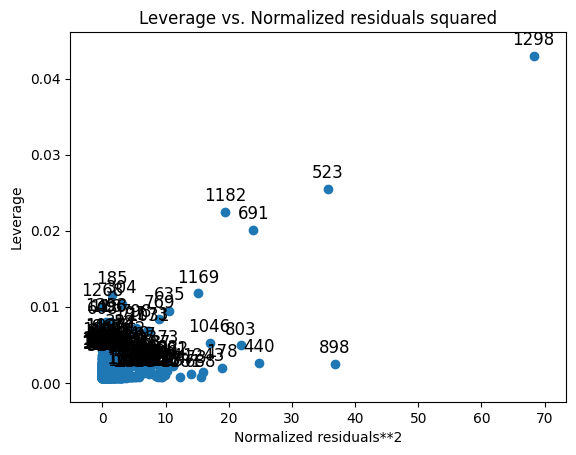

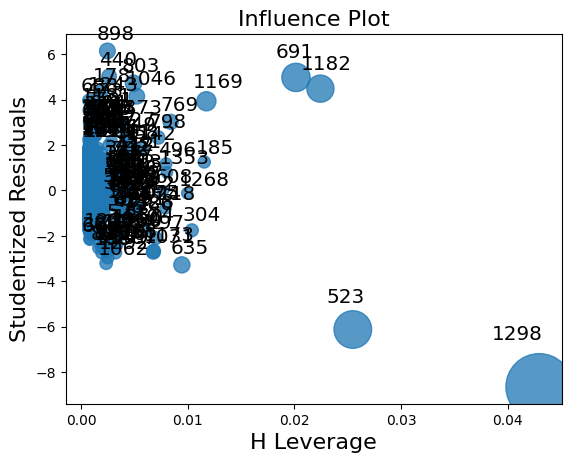

In [25]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(model1)
plt.show()

# plt.scatter(MEDVres.student_resid ** 2, MEDVres.leverage)
# for i, state in enumerate(boston_df.MEDV):
#     plt.annotate(state, [(MEDVres.student_resid ** 2)[i],  MEDVres.leverage[i]])
# plt.xlabel("Normalized Residuals**2")
# plt.ylabel("Leverage")
# plt.show()

influence_plot(model1)
plt.show()

# Modelling Approach Using Machine Learning Techniques
---

In [141]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

df2 = df1[['GrLivArea','SalePrice']]

scaler = preprocessing.StandardScaler()
scaler.fit(df2)
standard_df = scaler.transform(df2)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=standard_df,x='x1',y='x2',hue=labels,palette='Set1')

In [142]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(standard_df)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

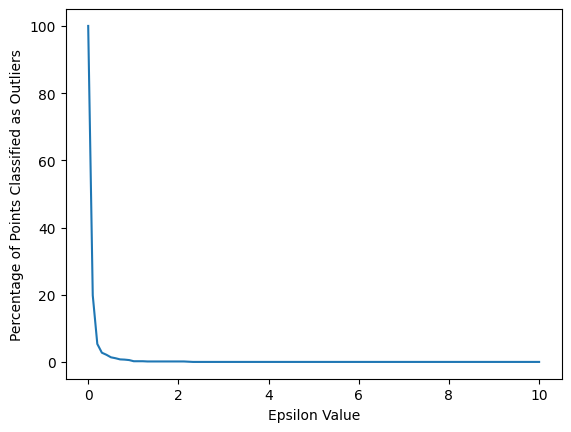

In [143]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

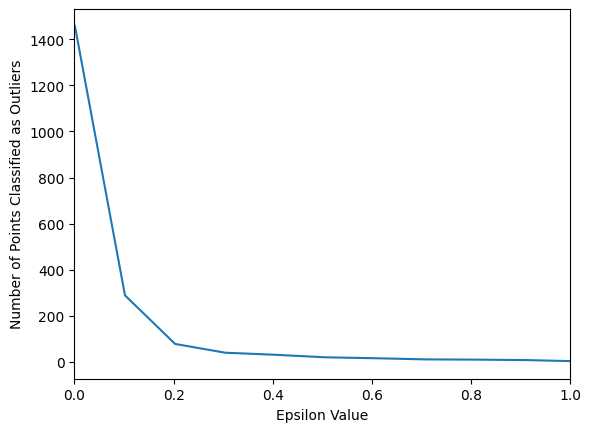

In [144]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

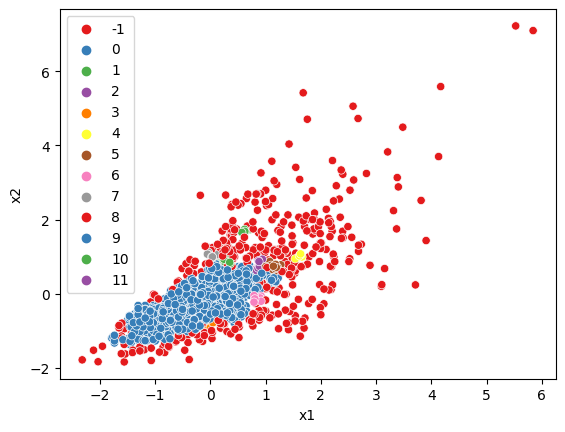

In [145]:
model = DBSCAN(eps=0.09)
display_categories(model,standard_df)

In [146]:
dbscan = DBSCAN(eps=0.09)
dbscan.fit(standard_df)

DBSCAN(eps=0.09)

In [147]:
len(dbscan.labels_)

1458

In [148]:
len(standard_df)

1458

In [149]:
standard_df

,x1,x2
0,0.393013,0.346896
1,-0.489391,0.007136
2,0.542706,0.535652
3,0.406800,-0.515088
4,1.354202,0.869120
...,...,...
1453,0.268925,-0.074658
1454,1.107996,0.365772
1455,1.633893,1.076752
1456,-0.851806,-0.488348


In [151]:
# for inverse transformation
inversed = pd.DataFrame(scaler.inverse_transform(standard_df), columns = ['GrLivArea','SalePrice'])
inversed

,GrLivArea,SalePrice
0,1710.0,208500.0
1,1262.0,181500.0
2,1786.0,223500.0
3,1717.0,140000.0
4,2198.0,250000.0
...,...,...
1453,1647.0,175000.0
1454,2073.0,210000.0
1455,2340.0,266500.0
1456,1078.0,142125.0


In [152]:
inversed['labels'] = pd.DataFrame(dbscan.labels_)
inversed

,GrLivArea,SalePrice,labels
0,1710.0,208500.0,0
1,1262.0,181500.0,0
2,1786.0,223500.0,0
3,1717.0,140000.0,0
4,2198.0,250000.0,-1
...,...,...,...
1453,1647.0,175000.0,0
1454,2073.0,210000.0,0
1455,2340.0,266500.0,4
1456,1078.0,142125.0,0


In [154]:
inversed.labels.unique()

array([ 0, -1,  1,  8,  5,  3,  2,  4,  6,  7, 11, 10,  9])

In [155]:
new_inversed = inversed[(inversed.labels != -1) & (~inversed.labels.isna())]
new_inversed

,GrLivArea,SalePrice,labels
0,1710.0,208500.0,0
1,1262.0,181500.0,0
2,1786.0,223500.0,0
3,1717.0,140000.0,0
5,1362.0,143000.0,0
...,...,...,...
1453,1647.0,175000.0,0
1454,2073.0,210000.0,0
1455,2340.0,266500.0,4
1456,1078.0,142125.0,0


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

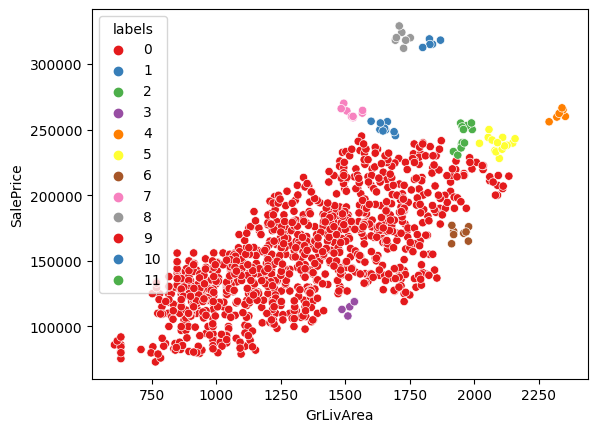

In [157]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=new_inversed,  hue= 'labels',palette='Set1')

----